In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

# Inserting Dataset

In [5]:
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv.csv')

In [6]:
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [7]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [8]:
df[' Frequency'].value_counts()

 M    267
Name:  Frequency, dtype: int64

In [9]:
print(df['Region.1'].value_counts())
print(df['Region'].value_counts())

North        79
South        60
West         50
East         40
Northeast    38
Name: Region.1, dtype: int64
Chhattisgarh        10
Punjab              10
Himachal Pradesh    10
Goa                 10
Maharashtra         10
Meghalaya           10
Delhi               10
West Bengal         10
Odisha              10
Kerala              10
Haryana             10
Uttar Pradesh       10
Bihar               10
Karnataka           10
Tamil Nadu          10
Uttarakhand         10
Jharkhand           10
Andhra Pradesh      10
Assam               10
Gujarat             10
Madhya Pradesh      10
Puducherry          10
Rajasthan           10
Telangana           10
Tripura             10
Jammu & Kashmir      9
Sikkim               8
Name: Region, dtype: int64


In [10]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
print('row count--->',df.shape[0])
print('column count--->',df.shape[1])

row count---> 267
column count---> 9


In [13]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [14]:
df[["day", "month", "year"]] = df[' Date'].str.split("-", expand = True)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,day,month,year
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740,31,01,2020
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740,29,02,2020
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740,31,03,2020
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740,30,04,2020
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740,31,05,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855,30,06,2020
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855,31,07,2020
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855,31,08,2020
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855,30,09,2020


In [15]:
df.drop(columns=[' Frequency'],axis=1,inplace=True)

In [16]:
df[:5]

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,day,month,year
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,15.9129,79.74,31,01,2020
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,15.9129,79.74,29,02,2020
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South,15.9129,79.74,31,03,2020
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South,15.9129,79.74,30,04,2020
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South,15.9129,79.74,31,05,2020


# visualizing the dataset

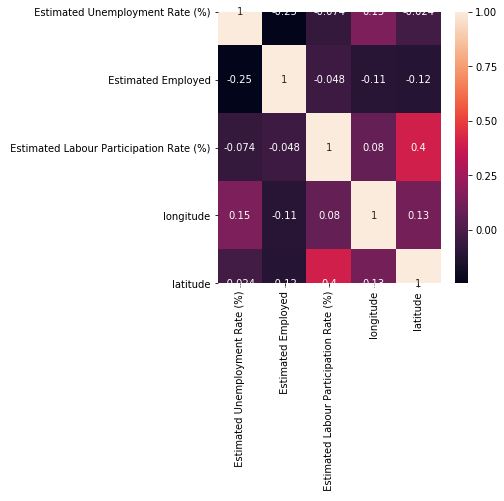

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
df.columns

In [18]:
import seaborn
print(seaborn.__version__)

0.9.0


In [19]:
import matplotlib.pyplot as plt

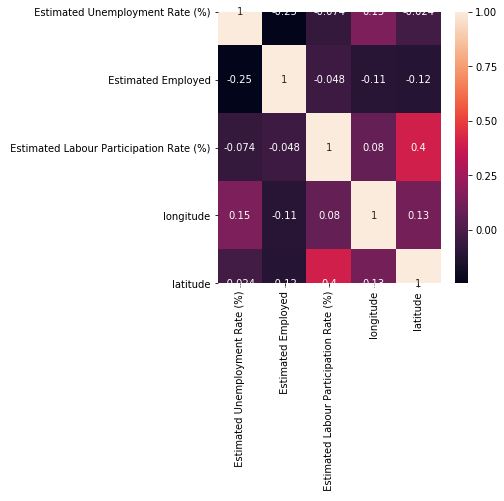

In [20]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
df.columns

Index(['Region', ' Date', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'day', 'month', 'year'],
      dtype='object')

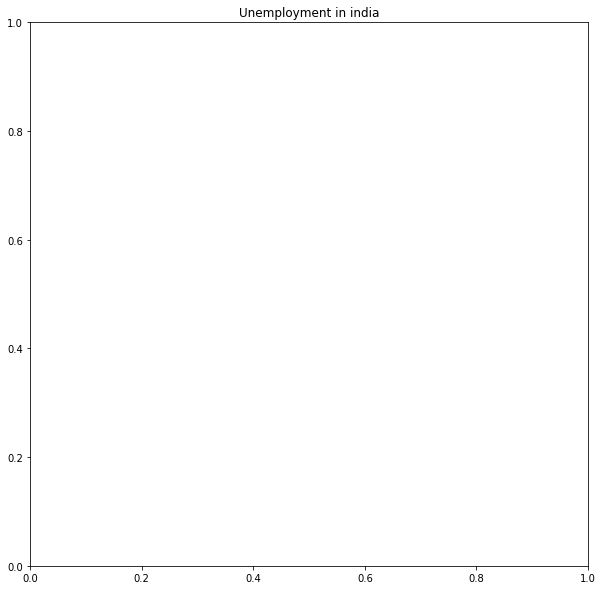

In [22]:
plt.figure(figsize=(10,10))
plt.title("Unemployment in india")
plt.show()

In [23]:
df.columns

Index(['Region', ' Date', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'day', 'month', 'year'],
      dtype='object')

In [24]:
df.month.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10'],
      dtype=object)

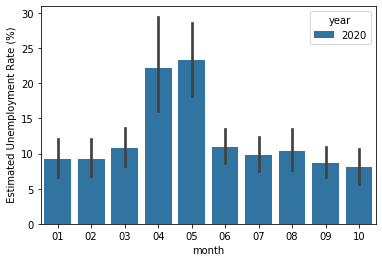

In [25]:
sns.barplot(x='month',y=' Estimated Unemployment Rate (%)',hue='year',data=df)

In [26]:
df.day.unique()

array([' 31', ' 29', ' 30'], dtype=object)

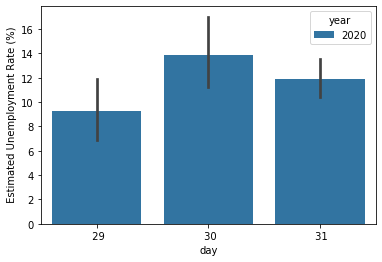

In [27]:
sns.barplot(x='day',y=' Estimated Unemployment Rate (%)',hue='year',data=df)

In [28]:
df[:5]

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,day,month,year
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,15.9129,79.74,31,01,2020
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,15.9129,79.74,29,02,2020
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South,15.9129,79.74,31,03,2020
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South,15.9129,79.74,30,04,2020
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South,15.9129,79.74,31,05,2020


In [29]:
#we can also drop this year column,beacause it also contains constant values of year 2020
df.drop('year',axis=1)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,day,month
0,Andhra Pradesh,31-01-2020,5.48,16635535,41.02,South,15.9129,79.740,31,01
1,Andhra Pradesh,29-02-2020,5.83,16545652,40.90,South,15.9129,79.740,29,02
2,Andhra Pradesh,31-03-2020,5.79,15881197,39.18,South,15.9129,79.740,31,03
3,Andhra Pradesh,30-04-2020,20.51,11336911,33.10,South,15.9129,79.740,30,04
4,Andhra Pradesh,31-05-2020,17.43,12988845,36.46,South,15.9129,79.740,31,05
...,...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,7.29,30726310,40.39,East,22.9868,87.855,30,06
263,West Bengal,31-07-2020,6.83,35372506,46.17,East,22.9868,87.855,31,07
264,West Bengal,31-08-2020,14.87,33298644,47.48,East,22.9868,87.855,31,08
265,West Bengal,30-09-2020,9.35,35707239,47.73,East,22.9868,87.855,30,09


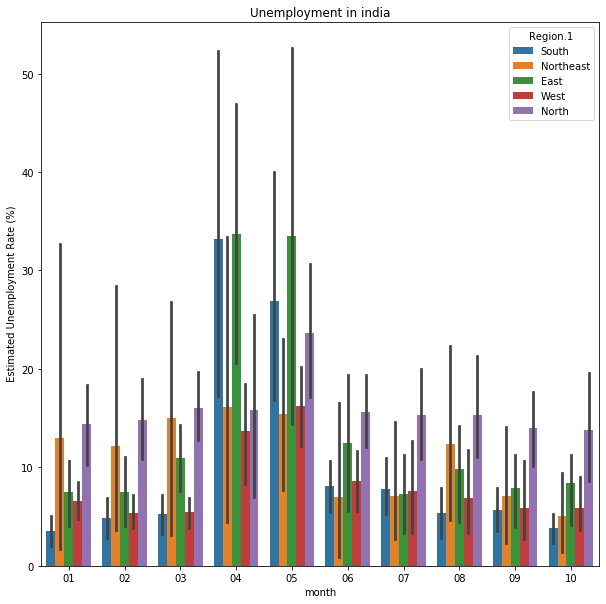

In [30]:
plt.figure(figsize=(10,10))
plt.title("Unemployment in india")
sns.barplot(x='month',y =' Estimated Unemployment Rate (%)',hue='Region.1', data=df)
plt.show()

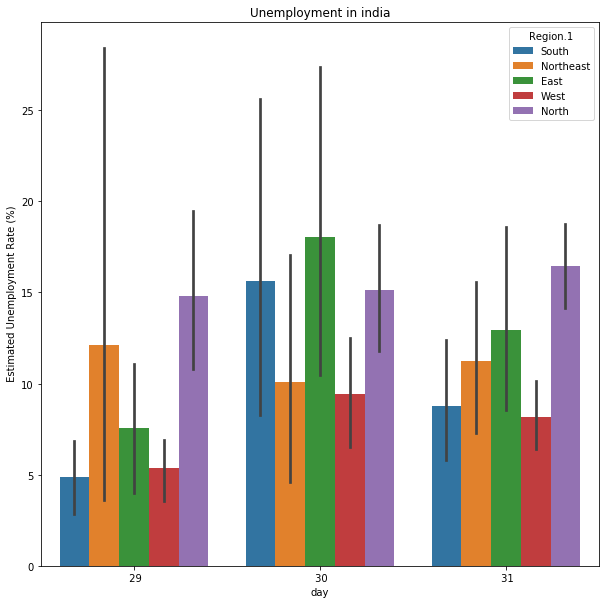

In [31]:
plt.figure(figsize=(10,10))
plt.title("Unemployment in india")
sns.barplot(x='day',y =' Estimated Unemployment Rate (%)',hue='Region.1', data=df)
plt.show()

In [35]:
df.columns

Index(['Region', ' Date', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'day', 'month', 'year'],
      dtype='object')